In [30]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.path import Path
from matplotlib.patches import PathPatch
import matplotlib
import scienceplots

plt.style.use(['science', 'russian-font'])

matplotlib.rcParams.update({
    'figure.figsize': [6, 4],
    'savefig.facecolor': 'white',
    'figure.dpi': 150.0,
    'font.size': 12.0,
})

In [55]:
prop = '-150000-3000'

In [56]:
from os import walk

names = []
for (_, _, filenames) in walk(fr'./data{prop}/'):
    names = filenames
    break

In [57]:
def draw_error_band(ax, x, y, err, **kwargs):
    # Calculate normals via centered finite differences (except the first point
    # which uses a forward difference and the last point which uses a backward
    # difference).
    dx = np.concatenate([[x[1] - x[0]], x[2:] - x[:-2], [x[-1] - x[-2]]])
    dy = np.concatenate([[y[1] - y[0]], y[2:] - y[:-2], [y[-1] - y[-2]]])
    l = np.hypot(dx, dy)
    nx = dy / l
    ny = -dx / l

    # end points of errors
    xp = x + nx * err
    yp = y + ny * err
    xn = x - nx * err
    yn = y - ny * err

    vertices = np.block([[xp, xn[::-1]],
                         [yp, yn[::-1]]]).T
    codes = np.full(len(vertices), Path.LINETO)
    codes[0] = Path.MOVETO
    path = Path(vertices, codes)
    ax.add_patch(PathPatch(path, **kwargs))

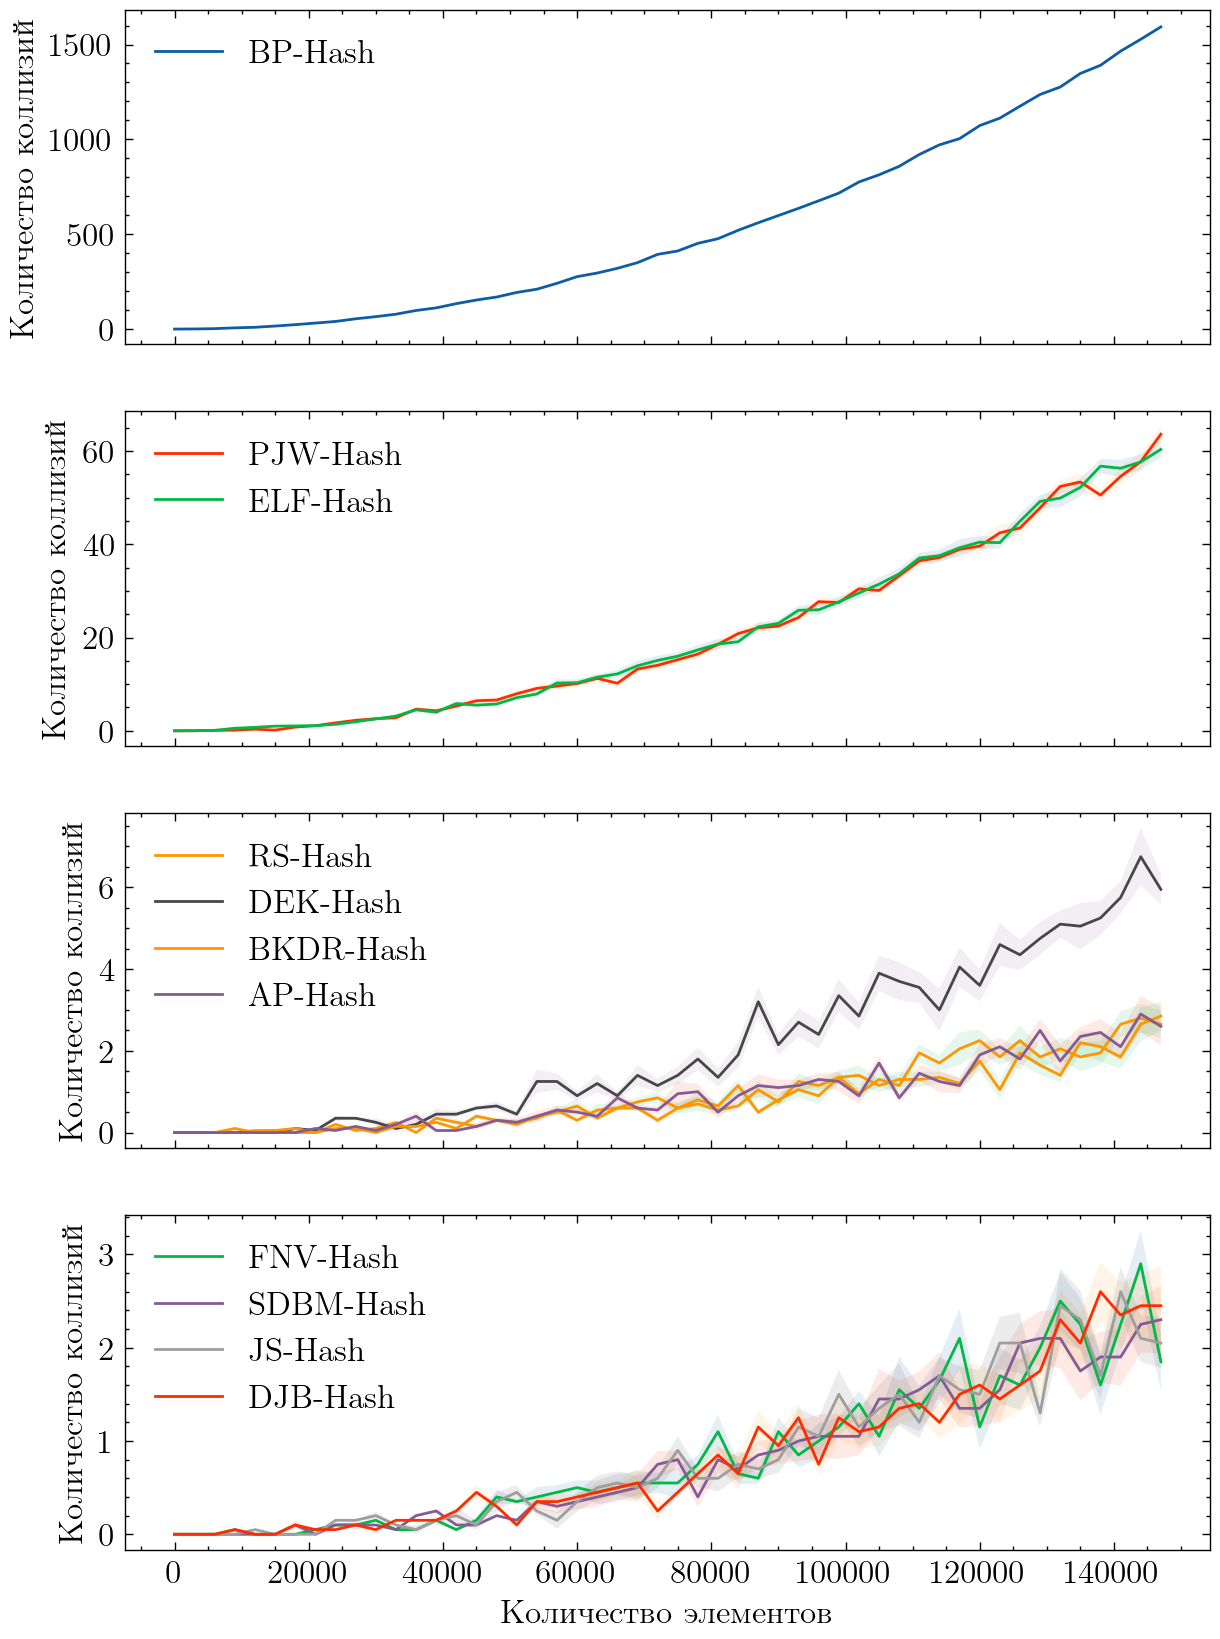

In [64]:
fig, axes = plt.subplots(4, 1, sharex=True, figsize=(7, 10), dpi=200)

for (i, name) in enumerate(names):
    df = pd.read_csv(fr'./data{prop}/{name}')
    
    num_count = np.array(df['num_count'])
    mean_coll = np.array(df['mean_coll'])
    std = np.array(df['std_dev'])
    
    flag_value = mean_coll[-1]
    border1 = 500
    border2 = 12
    border3 = 2.45
    number = 0
    
    if (flag_value > border1):
        number = 0
    elif (flag_value > border2):
        number = 1
    elif (flag_value > border3):
        number = 2
    else:
        number = 3
    axes[number].plot(num_count, mean_coll, alpha=1, label=name, color=f'C{i+1}')
    draw_error_band(axes[number], num_count, mean_coll, err=std, facecolor=f'C{i}', edgecolor="none", alpha=.1)

axes[-1].set_xlabel('Количество элементов')
for ax in axes:
    ax.set_ylabel('Количество коллизий')
    ax.legend(frameon=False)
    
fig.savefig(f'plot{prop}.png')